In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Cargamos los archivos parquet, ya explicado en el notebook de transformaciones

In [10]:
df = pd.read_parquet('../datasets/movie_dataset.parquet')

In [11]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,[Toy Story Collection],30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,None,Toy Story,7.7,5415.0,1995,12.451801
1,None,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,[Grumpy Old Men Collection],0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000
3,None,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
4,[Father of the Bride Collection],0.0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  object        
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45376 non-null  float64       
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45379 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  s

De inicio podemos ver utilizando el .head y el .info; que el tipo de los datos disponibles en el dataframe es logico y no dificultaran el siguiente analisis.

Tambien, se puede evidenciar de manera obvia la falta de muchos datos en la columna de `belongs_to_collection` y en la columna de `tagline`. Veamos en mayor profundidad estos dos hechos.

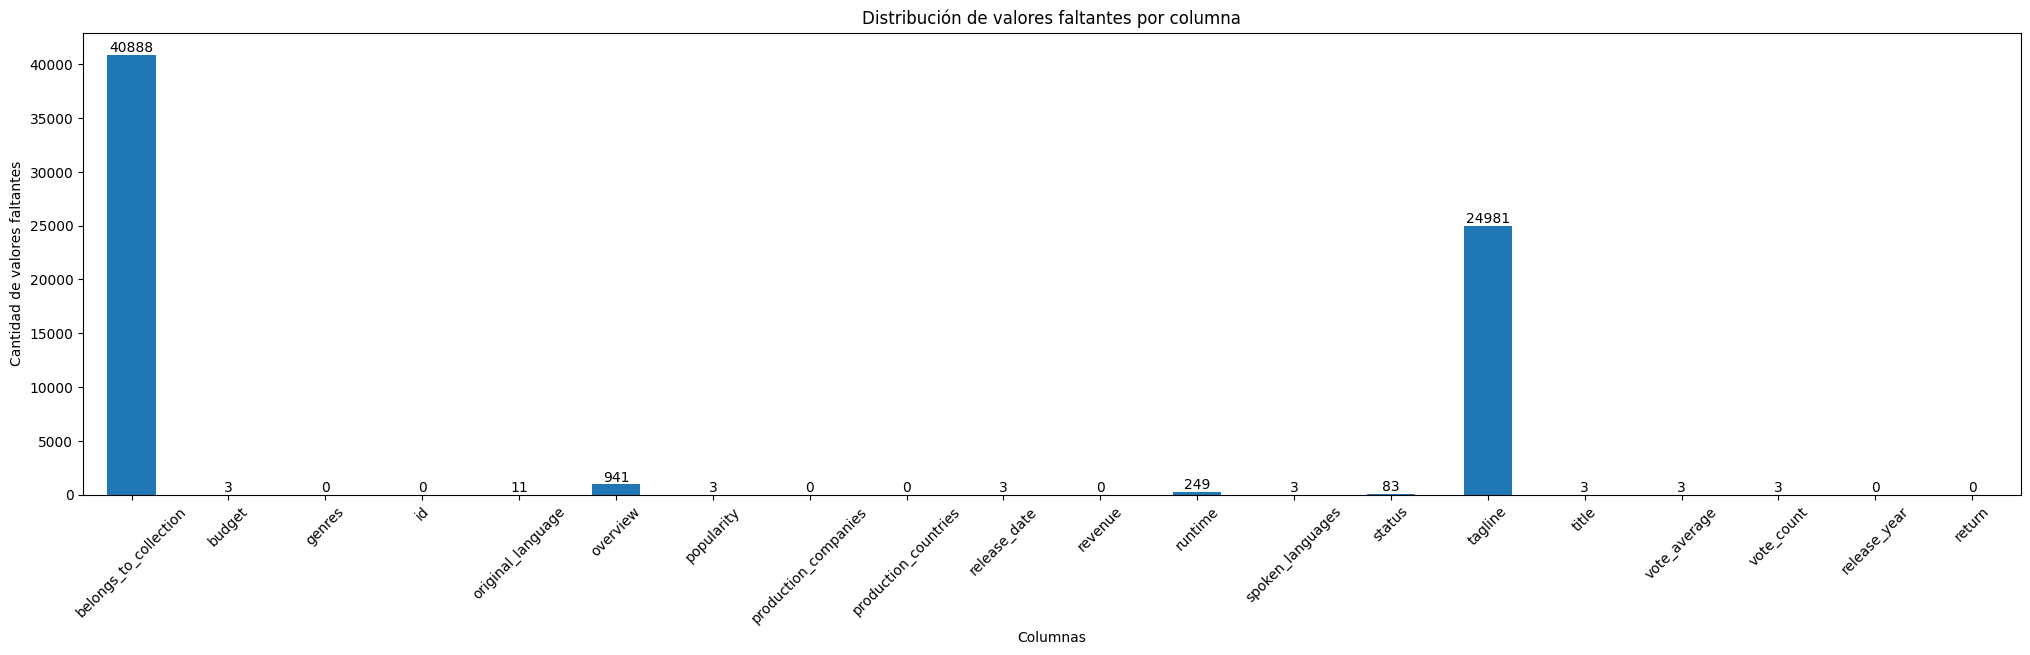

In [30]:
# Obtener el número de valores faltantes por columna
missing_values = df.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(25, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Distribución de valores faltantes por columna')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(missing_values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

Podemos evidenciar la gran disparidad en la ausencia de datos entre `belongs_to_collection` y `tagline` con los demas, ademas de datos faltantes (En menor proporcion) en las demas columnas. Entremos en mayor detalle sobre la naturaleza de estas 2 columnas.

In [71]:
# Convertir los valores de las columnas 'belongs_to_collection' y 'tagline' a cadenas de texto
df['belongs_to_collection'] = df['belongs_to_collection'].astype(str)
df['tagline'] = df['tagline'].astype(str)

# Agrupar el DataFrame según la columna especificada y contar los valores
result = df.groupby('belongs_to_collection').size().reset_index(name='count')
result_2 = df.groupby('tagline').size().reset_index(name='count')
# Mostrar los resultados
display(result)
print('------------------------------------------------------------------------------')
display(result_2)

,belongs_to_collection,count
0,None,40888
1,['... Has Fallen Collection'],2
2,['00 Schneider Filmreihe'],1
3,['08/15 Collection'],1
4,['100 Girls Collection'],2
...,...,...
1641,['Чебурашка и крокодил Гена'],1
1642,['Что Творят мужчины! (Коллекция)'],2
1643,['男はつらいよ シリーズ'],3
1644,['식객 시리즈'],2


------------------------------------------------------------------------------


,tagline,count
0,,1
1,"""A great kid!"" ""A great bet!"" ""A great show!""",1
2,"""A simple prank, a game nobody won...""",1
3,"""All the world likes an outlaw. For some damn ...",1
4,"""An eye for an eye-a hate for a hate-that my g...",1
...,...,...
20265,…you won't be coming home!,1
20266,劇場版 クラナド,1
20267,日本は多様化している — Japan is Changing,1
20268,最后的舞者,1


Con los graficos anteriores podemos observar la razon de tantos valores faltantes en ambas columnas; No todas las peliculas hacen parte de una coleccion o una saga de peliculas, lo cual ocasione que haya tantos valores faltantes en estas; y en el caso de tagline, como su nombre traducido lo dice "Frase celebre", no todas tienen una misma.